In [1]:
import math

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#안찾아지는 컬럼
data_df = pd.read_csv("train.csv", index_col='no')
print("총 data size : ",data_df.shape[0] )

총 data size :  29305


In [3]:
# data_df.age.describe()
# pd.DataFrame.plot.barh(data_df.age)
data_df_conti = data_df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']]
data_df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000
mean,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096
std,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


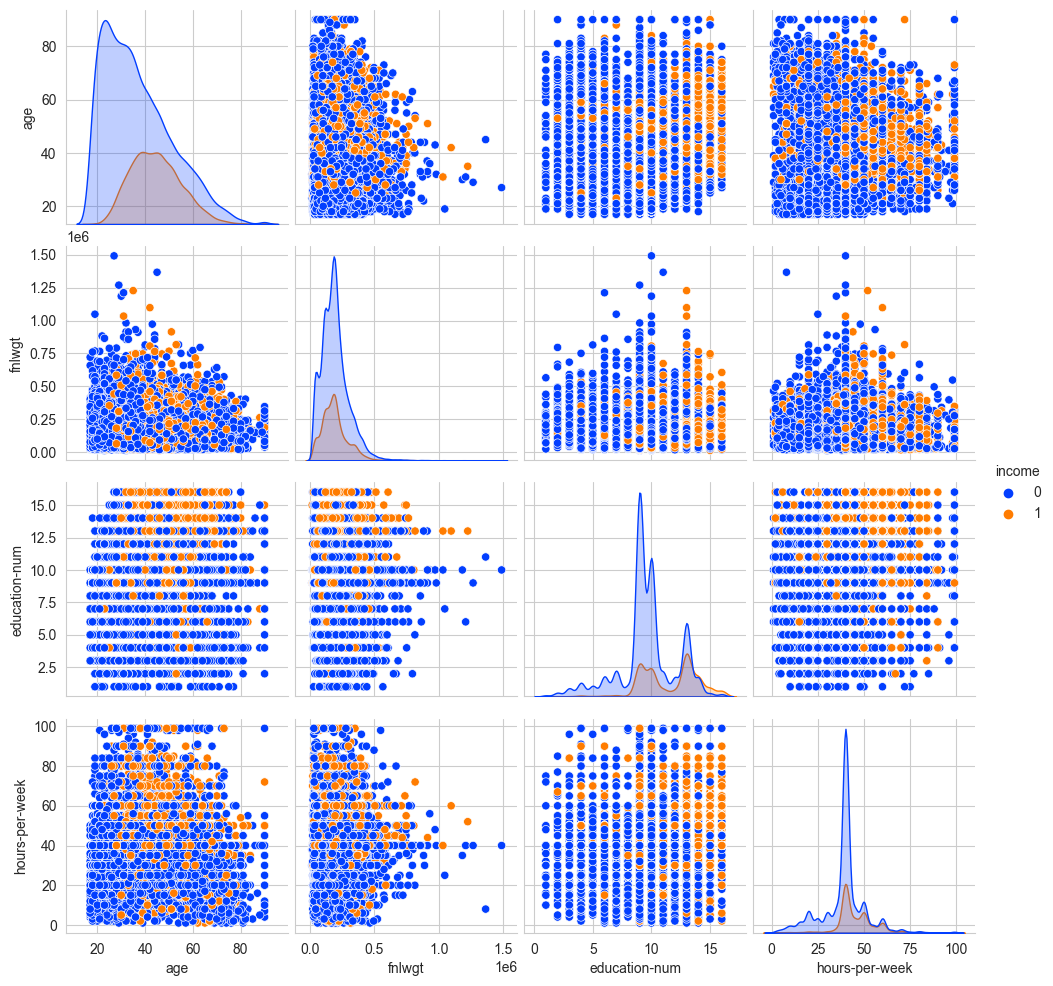

In [4]:
data_df_conti = data_df[['age','fnlwgt','education-num','hours-per-week','income']]
import seaborn as sns
sns.pairplot(data_df_conti,
            diag_kind='kde', 
            hue = 'income',
            palette='bright')
plt.show()


# age ->
#### 5살 단위로 줄이자, 나이가 너무 많은 사람은 삭제하자

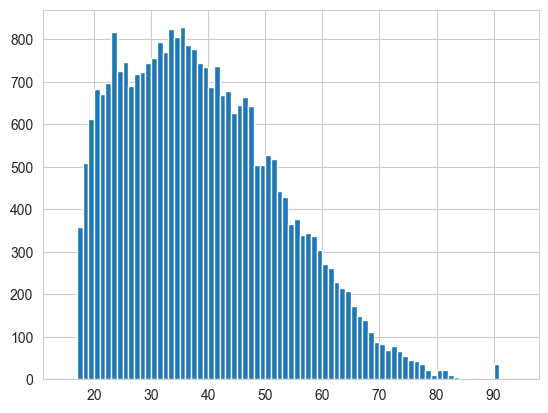

In [5]:
# age -> 5살 단위로 줄이자, 나이가 너무 많은 사람은 삭제하자
plt.hist(data_df.age, bins=range(15, 95,1))
plt.show() # 90 대가 이상치 인것으로 생각됨.

<AxesSubplot: xlabel='age', ylabel='Count'>

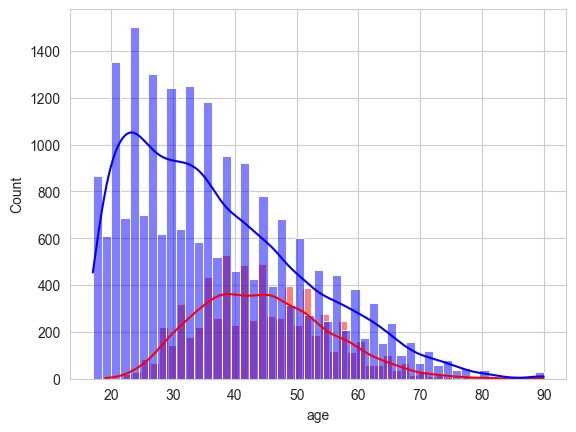

In [6]:
import seaborn as sns
sns.histplot(data_df.age[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.age[data_df['income']==0], kde=True, color="blue")

<AxesSubplot: xlabel='age', ylabel='Density'>

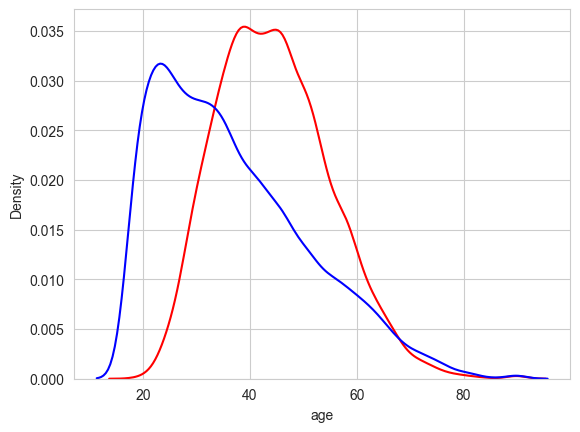

In [7]:
import seaborn as sns
sns.kdeplot(data_df.age[data_df['income']==1], color="red")
sns.kdeplot(data_df.age[data_df['income']==0], color="blue")

## 범주화 코드

In [8]:
from mylib import Mylib
from sklearn.preprocessing import MinMaxScaler
# data_df['age'] = Mylib.preProc_age(data_df['age'])

In [9]:
data_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [10]:
data_df.age.unique()

array([25, 39, 35, 64, 24, 66, 56, 70, 21, 33, 45, 54, 63, 58, 44, 31, 17,
       43, 18, 23, 50, 19, 38, 29, 30, 47, 28, 22, 59, 34, 49, 36, 32, 46,
       42, 61, 40, 26, 57, 27, 41, 37, 60, 48, 62, 53, 68, 75, 20, 51, 73,
       69, 72, 65, 76, 52, 55, 74, 90, 67, 78, 80, 77, 71, 81, 83, 82, 79,
       85, 87, 84, 88, 86, 89])

# fnlwgt : 관계성이 없어 보이는데?

In [11]:
data_df.fnlwgt.head()

no
1    219199
2     52978
3    196899
4    135527
5     60783
Name: fnlwgt, dtype: int64

<AxesSubplot: xlabel='fnlwgt', ylabel='Count'>

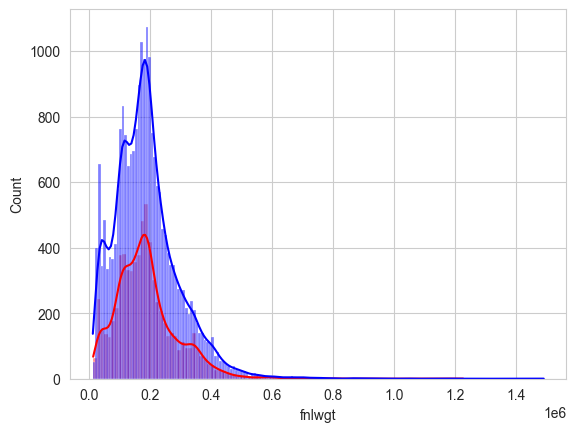

In [12]:
sns.histplot(data_df.fnlwgt[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.fnlwgt[data_df['income']==0], kde=True, color="blue")

## 한쪽으로 너무 치우쳐 있다. 정규화 하자


## 카테고리화


In [13]:
data_df.fnlwgt

no
1        219199
2         52978
3        196899
4        135527
5         60783
          ...  
29301    100605
29302    372636
29303    258474
29304    157446
29305     94809
Name: fnlwgt, Length: 29305, dtype: int64

# education-num
#### 이것도 범주화 하자

In [14]:
#예를 들어 education_num이 11이면 Assoc_voc(전문학교 준학사)를,
# education_num이 13이면 Bachelors(학사)를,
# education_num이 9이면 HS-grad(고등학교 졸업)를 나타냅니다.
data_df['education-num'].value_counts()

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64

## 범주화 코드

In [15]:
data_df[data_df['education-num'].isnull()].shape


(0, 15)

In [16]:
# 1 ~ 3 : 초등학교
# 4 ~ 6 : 중학교
# 7 ~ 9 : 고등학교
# 10 ~ 11 : 전문대
# 12 ~ 13 : 대학교
# 14 ~ : 대학원
b = [0,3,6,9,11,13,40]
label = ['E','M','H','C','U','MA']
data_df['education-num'] =  pd.cut(data_df['education-num'], bins=b, labels=label)

In [17]:
data_df['education-num'].head()

no
1    H
2    C
3    U
4    C
5    C
Name: education-num, dtype: category
Categories (6, object): ['E' < 'M' < 'H' < 'C' < 'U' < 'MA']

In [18]:
data_df['education-num'].unique()

['H', 'C', 'U', 'M', 'MA', 'E']
Categories (6, object): ['E' < 'M' < 'H' < 'C' < 'U' < 'MA']

# 'capital-gain','capital-loss'
#### 데이터가 너무 없다.. 전부 드랍

<AxesSubplot: xlabel='capital-gain', ylabel='Count'>

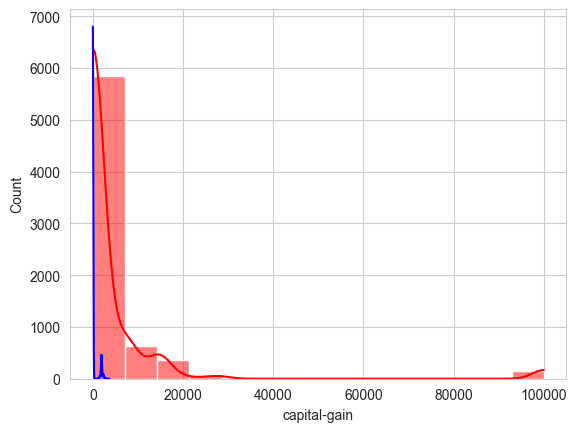

In [19]:
sns.histplot(data_df['capital-gain'][data_df['income']==1],  kde=True, color="red")
sns.histplot(data_df['capital-loss'][data_df['income']==1], kde=True, color="blue")

<AxesSubplot: xlabel='capital-loss', ylabel='Density'>

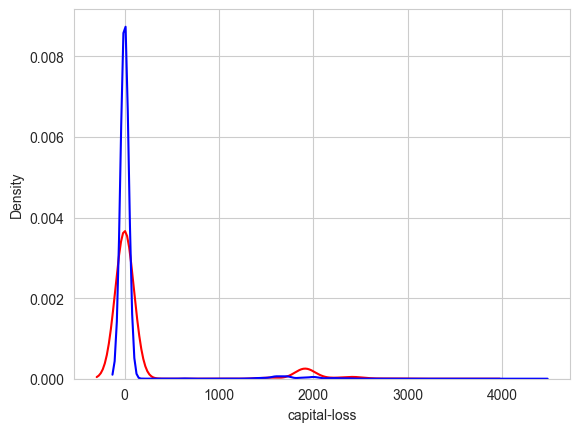

In [20]:
sns.kdeplot(data_df['capital-loss'][data_df['income']==1], color="red")
sns.kdeplot(data_df['capital-loss'][data_df['income']==0], color="blue")

# workclass

In [25]:
data_df.shape[0]

29305

In [26]:
data_df.workclass.value_counts().apply(lambda x: x/data_df.shape[0] * 100)

 Private             69.646818
 Self-emp-not-inc     7.865552
 Local-gov            6.374339
 ?                    5.674800
 State-gov            4.098277
 Self-emp-inc         3.368026
 Federal-gov          2.914178
 Without-pay          0.040949
 Never-worked         0.017062
Name: workclass, dtype: float64

In [21]:
def filter_workclass(X):
    for key, value in level_dic.items():
        if X in value:
            return key
data_df['workclass'] = data_df['workclass'].apply(filter_workclass)

NameError: name 'level_dic' is not defined

In [ ]:
sns.histplot(data_df.workclass[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.workclass[data_df['income']==0], kde=True, color="blue")


# marital-status

In [ ]:
data_df['marital-status'].unique()


# occupation
#### 직업간의 확률이 비슷한 것끼리 카테고리하자

In [ ]:
data_df.occupation.unique()

In [ ]:
sns.histplot(data_df.occupation[data_df['income']==1], kde=True, color="red")
sns.histplot(data_df.occupation[data_df['income']==0], kde=True, color="blue")

In [ ]:
a = pd.concat([data_df.occupation.value_counts(), data_df.occupation[data_df.income==1].value_counts()], axis=1)

In [ ]:
a['c'] = a.iloc[:,1] / a.iloc[:,0] * 100
a = a.sort_values(by='c', ascending=False)
display(a)

In [ ]:
a['c'] = a['c'].fillna(0)
level_dic = {
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
}
for ele in a.index:
    level = a.loc[ele]['c']
    if level < 5 : level_dic[0].append(ele)
    elif level < 10 : level_dic[1].append(ele)
    elif level < 15 : level_dic[2].append(ele)
    elif level < 20 : level_dic[3].append(ele)
    elif level < 25 : level_dic[4].append(ele)
    elif level < 30 : level_dic[5].append(ele)
    elif level < 35 : level_dic[6].append(ele)
    elif level < 40 : level_dic[7].append(ele)
    elif level < 45 : level_dic[8].append(ele)
    else : level_dic[9].append(ele)

print(level_dic)

In [ ]:
def filter_country(X):
    for key, value in level_dic.items():
        if X in value:
            return key
data_df['occupation'] = data_df['occupation'].apply(filter_country)

In [ ]:
data_df

In [ ]:
a.c.plot.barh()

# relationship

In [ ]:
data_df.relationship.unique()

In [ ]:
a = pd.concat([data_df.relationship.value_counts(), data_df.relationship[data_df.income == 1].value_counts()], axis=1)
a['c'] = a.iloc[:, 1] / a.iloc[:, 0] * 100
a = a.sort_values(by='c', ascending=False)
display(a)

# race

In [ ]:
data_df.race.unique()

# sex

In [ ]:
data_df.sex.unique()

In [ ]:
a = pd.concat([data_df.sex.value_counts(), data_df.sex[data_df.income == 1].value_counts()], axis=1)
a['c'] = a.iloc[:, 1] / a.iloc[:, 0] * 100
a = a.sort_values(by='c', ascending=False)
display(a)

# native-country
#### 비슷한 확률끼리 카테고리하자



In [ ]:
data_df['native-country'].unique()

In [ ]:
import math
a = pd.concat([data_df['native-country'].value_counts(), data_df['native-country'][data_df.income == 1].value_counts()], axis=1)
a['c'] = a.iloc[:, 1] / a.iloc[:, 0] * 100
a = a.sort_values(by='c', ascending=False)
a['c'] = a['c'].round(0)
display(a)

In [ ]:
a['c'] = a['c'].fillna(0)

In [ ]:
level_dic = {
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
}
for ele in a.index:
    level = a.loc[ele]['c']
    if level < 5 : level_dic[0].append(ele)
    elif level < 10 : level_dic[1].append(ele)
    elif level < 15 : level_dic[2].append(ele)
    elif level < 20 : level_dic[3].append(ele)
    elif level < 25 : level_dic[4].append(ele)
    elif level < 30 : level_dic[5].append(ele)
    elif level < 35 : level_dic[6].append(ele)
    elif level < 40 : level_dic[7].append(ele)
    elif level < 45 : level_dic[8].append(ele)
    else : level_dic[9].append(ele)

print(level_dic)
# a.apply(lambda x: x['C'])

In [ ]:
def filter_country(X):
    for key, value in level_dic.items():
        if X in value:
            return key
# data_df['native-country'] = data_df['native-country'].apply(filter_country)


In [ ]:
data_df['native-country'] = data_df['native-country'].apply(lambda x : x if x ==' United-States' else 'others')

### 완료

In [ ]:
final_data2 = pd.get_dummies(final_data, columns=['workclass','education-num','marital-status','occupation','relationship','race','sex','native-country'])

In [ ]:
final_data2

In [ ]:
# final_data2= final_data2.drop(columns='capital-gain')

# 이제 확률 계산하기


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data2.drop(columns='income'), final_data['income'], test_size=0.3, random_state=0)

In [ ]:
X_train.shape,y_train.shape

# Random ForestClassifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
#
# forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
#
# forest_model.fit(X_train, y_train)

# Xgboost

In [ ]:
import xgboost
print(xgboost.__version__)

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
                            gamma=0.25,
                            max_depth=4,
                            learning_rate=0.1,
                            n_estimators=100,
                            min_child_weight=1.1)
                        # learning_rate=0.6,
                        # n_estimators=500,
                        # n_jobs=-1,
                        # random_state=42)
xgb_clf.fit(X_train, y_train)

In [ ]:
xgb.to_graphviz(xgb_clf, num_trees=0, size="10,10")

In [ ]:
from sklearn.model_selection import cross_val_score
tree_model_result = cross_val_score(xgb_clf, X_test, y_test, cv = 10)

print('교차검증 결과:', tree_model_result)
print('교차검증 결과 평균값', tree_model_result.mean())

In [ ]:
# xgb_clf.score(X_test,y_test)
xgb_clf.score(X_train,y_train)